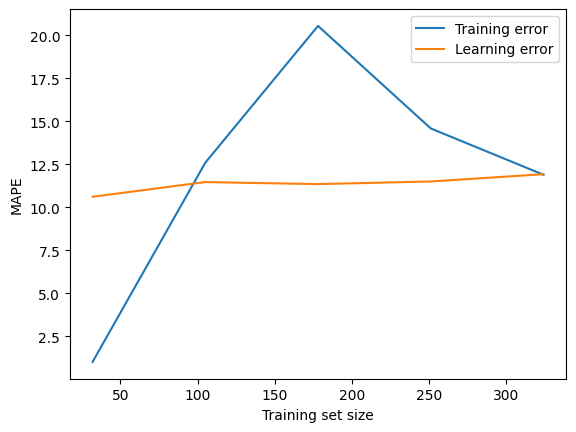

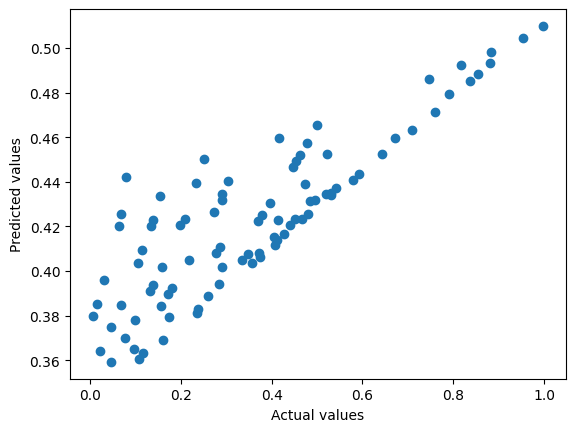

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Load data from csv or txt file
data = pd.read_csv('../datasets/A1-turbine-scaled.txt', sep='\t', skiprows=1)

# Split data into features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Train the model
learning_rate = 0.01
momentum = 0.9
regressor = SGDRegressor(learning_rate="constant", eta0 = learning_rate, alpha=momentum, loss="squared_error", max_iter=2000)
regressor.fit(X_train, y_train)

# Predict the test set results
y_pred = regressor.predict(X_test)

# Calculate the mean absolute percentage error
mape = mean_absolute_percentage_error(y_test, y_pred)

# Plot the training error vs learning curve
train_sizes, train_scores, test_scores = learning_curve(regressor, X_train, y_train, cv=10, scoring='neg_mean_absolute_percentage_error')
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Learning error')
plt.xlabel('Training set size')
plt.ylabel('MAPE')
plt.legend()
plt.show()

# Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()
